In [ ]:
import numpy as np
import pandas as pd

In [ ]:
train_df = pd.read_csv("train.csv")

train_df.head()

In [ ]:
test_df = pd.read_csv("test.csv")

test_df.head()

In [ ]:
len(test_df)

In [ ]:
derived = pd.read_csv('derived.csv')

In [ ]:
len(derived)

In [ ]:
train_df["target"].value_counts()

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
X_train = train_df["title"].values
X_test = test_df["title"].values
y_train = train_df["target"].astype(int).values

# Simple baseline

In [ ]:
y_pred = [int("порно" in text) for text in X_train]

In [ ]:
f1_score(y_train, y_pred)

### Submit

In [ ]:
test_df["target"] = [("порно" in text) for text in X_test]

test_df[["id", "target"]].to_csv("simple_baseline.csv", index=False)

!cat simple_baseline.csv | head

### Не все так однозначно

**не порно**:
- Болезни опорно-двигательной системы и импотенция: взаимосвязь
- Транссексуальные рыбы - National Geographic Россия: красота мира в каждом кадре
- Групповая обзорная экскурсия по Афинам - цена €50
- Больного раком Задорнова затравили в соцсетях.
- Гомосексуалисты на «Первом канале»? Эрнст и Галкин – скрытая гей-пара российского шоу-бизнеса | Заметки о стиле, моде и жизни

**порно**:
- Отборная домашка
- Сюзанна - карьера горничной / Susanna cameriera perversa (с русским переводом) 1995 г., DVDRip

# ML baseline

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer = CountVectorizer()

model = MultinomialNB()

In [ ]:
X_train_vectorized = vectorizer.fit_transform(X_train)

In [ ]:
X_train_vectorized

In [ ]:
feature_names = np.array(vectorizer.get_feature_names())

In [ ]:
id_ = 42

print(X_train[id_])

x_vector = X_train_vectorized.getrow(id_).toarray()[0]

[feature for feature in feature_names[x_vector > 0]]

In [ ]:
%%time

model.fit(
    X_train_vectorized,
    y_train
)

y_pred = model.predict(
    X_train_vectorized
)

In [ ]:
f1_score(y_train, y_pred)

### Submit

In [ ]:
# X_test_vectorized = vectorizer.transform(X_test)

# test_df["target"] = model.predict(X_test_vectorized).astype(bool)

# test_df[["id", "target"]].to_csv("ml_baseline.csv", index=False)

# !cat ml_baseline.csv | head

In [97]:
import numpy as np
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
import collections
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

train_df_cleared = train_df

In [98]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus
# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus
# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud
def remove_some_words(text):
    table = {}
    return 0
def remove_punct(text):
    table = {33: ' ', 34: ' ', 35: ' ', 36: ' ', 37: ' ', 38: ' ', 39: ' ', 40: ' ', 41: ' ', 42: ' ', 43: ' ', 44: ' ', 45: ' ', 46: ' ', 47: ' ', 58: ' ', 59: ' ', 60: ' ', 61: ' ', 62: ' ', 63: ' ', 64: ' ', 91: ' ', 92: ' ', 93: ' ', 94: ' ', 95: ' ', 96: ' ', 123: ' ', 124: ' ', 125: ' ', 126: ' '}
    return text.translate(table)
def lemm(doc):
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split():
        if token:
            token = token.strip()
            token = morph.normal_forms(token)[0]
            
            tokens.append(token)
    if len(tokens) > 2:
        return tokens
    return None 

In [99]:
import re
from pymorphy2 import MorphAnalyzer
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from string import punctuation
russian_stopwords = stopwords.words("russian")
eng_stopwords = stopwords.words("english")


# Удаление знаков пунктуации из текста
banned = {'mail.ru','тыс. результатов','ru', 'mail', 'страница', 'поиск', "купить", "онлайн", "фото", "видео", "тыс", "результатов", "бесплатно", "скачать", "смотреть", "mp3"}
train_df_cleared['title'] = train_df_cleared['title'].map(lambda x: x.lower())
train_df_cleared['title'] = train_df_cleared['title'].map(lambda x: remove_punct(x))
train_df_cleared['title'] = train_df_cleared['title'].map(lambda x: x.split(' '))
train_df_cleared['title'] = train_df_cleared['title'].map(lambda x: [token for token in x if token not in russian_stopwords and token != " " and token.strip() not in punctuation and token not in eng_stopwords and token not in banned])

# train_df_cleared['title'] = train_df_cleared['title'].apply(lemm)

train_df_cleared['title'] = train_df_cleared['title'].map(lambda x: ' '.join(x))



patterns = "[A-Za-z0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
morph = MorphAnalyzer()

train_df_cleared['title'].apply(lemm)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gerai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0         [экс, министр, экономика, молдова, глава, мидэ...
1         [этот, песня, стать, известный, многий, телезр...
2                     [банша, сезон, серия, бремя, красота]
3                                                      None
4         [новомосковск, сыграть, следж, хоккеист, алекс...
                                ...                        
135304     [пора, тюльпан, турецкий, сериал, русский, язык]
135305    [остросюжетный, сериал, «шеф, игра, повышение»...
135306                                                 None
135307                 [сыворотка, питательный, мл, москва]
135308       [технический, спирт, канистра, флакон, москва]
Name: title, Length: 135309, dtype: object

<AxesSubplot:>

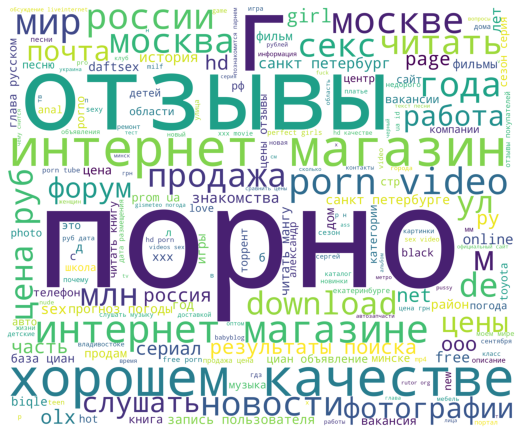

In [100]:
corpus = get_corpus(train_df_cleared['title'].sample(10000).values)
procWordCloud = get_wordCloud(corpus)
fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [101]:
X_train_cl = train_df_cleared["title"].values
X_test_cl = train_df_cleared["title"].values
y_train_cl = train_df_cleared["target"].astype(int).values

In [102]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

vectorizer = CountVectorizer()

model = MultinomialNB()

X_train_cleared_vectorized = vectorizer.fit_transform(X_train_cl)

feature_names = np.array(vectorizer.get_feature_names())

# x_vector = X_train_cleared_vectorized.getrow(id_).toarray()[0]

# [feature for feature in feature_names[x_vector > 0]]


model.fit(
    X_train_cleared_vectorized,
    y_train_cl
)

y_pred = model.predict(
    X_train_cleared_vectorized
)

f1_score(y_train_cl, y_pred)

c:\users\gerai\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


0.9138490172301965

In [85]:

f1_score(y_train_cl, y_pred)

0.8980618603853411

In [105]:
X_test_vectorized_cl = vectorizer.transform(X_test_cl)
print(X_test_vectorized_cl.shape, X_test_cl.shape)

test_df["target"] = model.predict(X_test_vectorized_cl).astype(bool)

test_df[["id", "target"]].to_csv("ml_baseline.csv", index=False)


(135309, 189501) (135309,)


ValueError: Length of values (135309) does not match length of index (165378)

In [107]:
test_df = pd.read_csv("test.csv")
X_test = test_df["title"].values
X_test_vectorized = vectorizer.transform(X_test)
test_df["target"] = model.predict(X_test_vectorized).astype(bool)
test_df[["id", "target"]].to_csv("ml_baseline.csv", index=False)